## THE SPARKS FOUNDATION (GRIP) -APRIL 2021

## DATA SCIENCE AND BUSINESS ANALYTICS

## NIDHI MANKALA

***TASK 2- PREDICTION USING UNSUPERVISED ML***

import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans


read the dataset

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

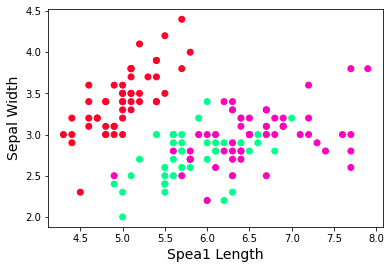

In [18]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)

Finding the optimum number of clusters for k-means classification

In [7]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
w = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0,
                    precompute_distances='deprecated')
    kmeans.fit(x)
    w.append(kmeans.inertia_)

plotting the data

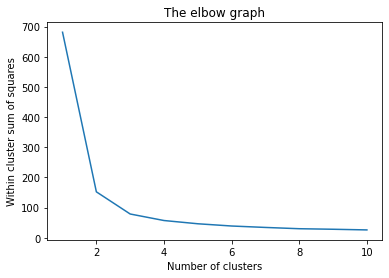

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.show()

we can conclude that when the within cluster sum of squares doesn't decrease significantly with every iteration we can stop. so in this case k=3

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

visualizing the data

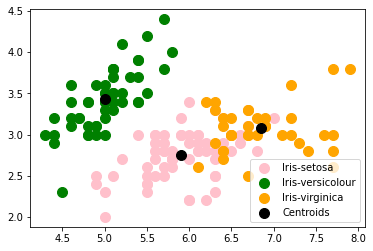

In [19]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend()